**Instalación y Configuración de SQL Server en EC2 con Windows Server 2019 y Optimización de Almacenamiento RAID**

**Crear y configurar una máquina virtual con Windows Server 2019**



*   Accedemos al [sitio oficial](https://www.microsoft.com/es-es/evalcenter/download-windows-server-2019) de Microsoft y descargamos la ISO de Windows Server 2019.
*   Guardamos la ISO en una ubicación conocida en nuestro equipo.
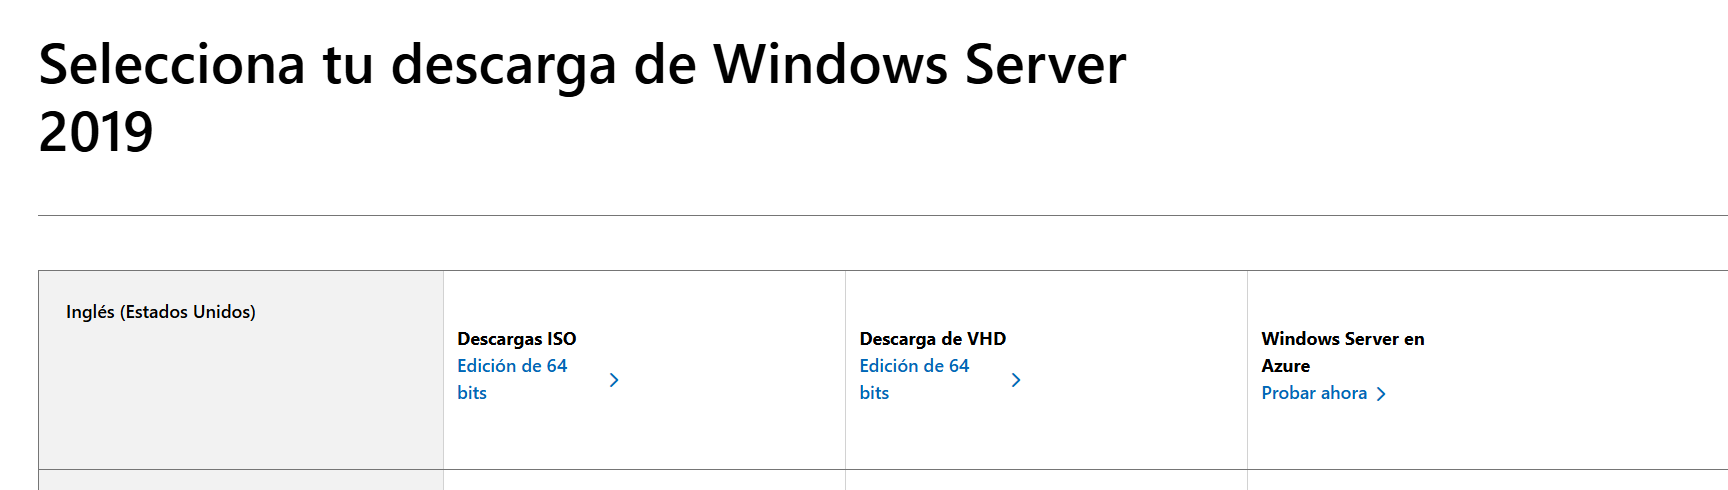
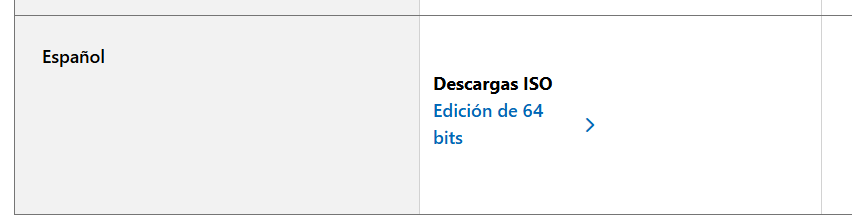




*   Abrimos VirtualBox.
*   Hacemos clic en el botón Nuevo.
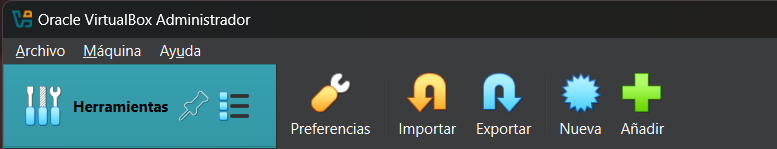


*   En la ventana emergente introducimos la siguiente configuración:

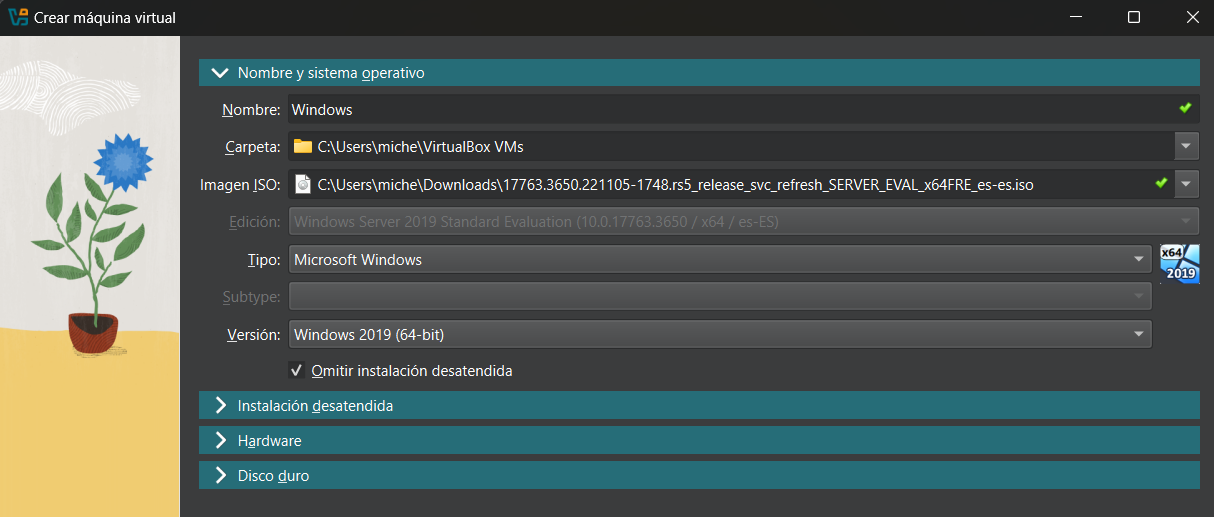
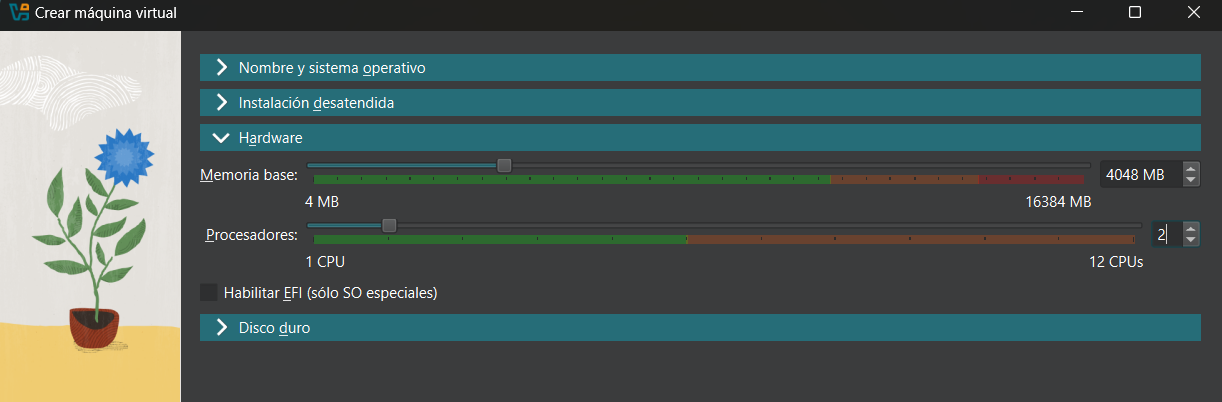

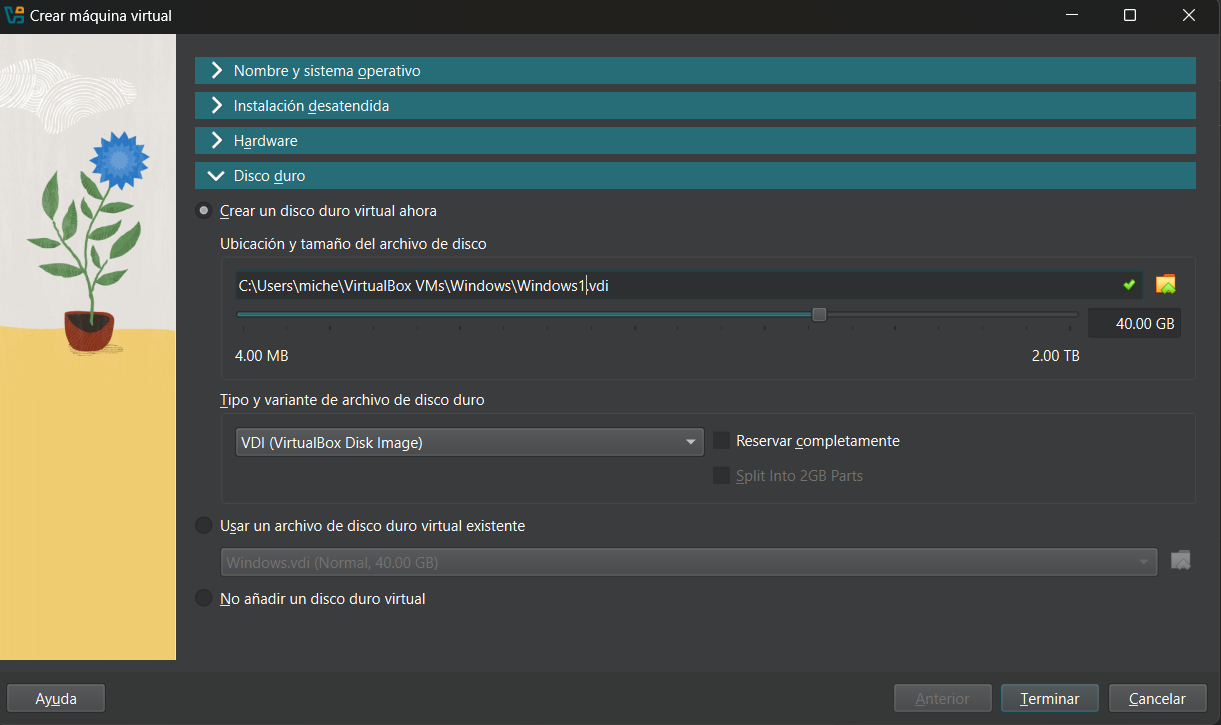

*   Hacemos clic en Terminar.
*   Luego de haber sido creada la máquina virtual vamos a configuración y desde ahí nos dirigimos a Almacenamiento y agregamos 11 discos adicionales:
Hacemos clic en el ícono y seleccionamos Añadir disco duro.
Creamos cada disco con 30 GB de capacidad.
Repetimos este proceso hasta completar los 11 discos.

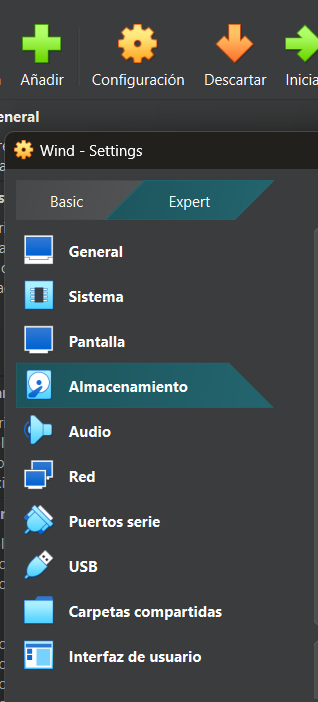
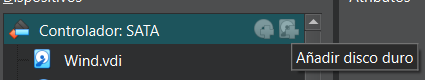
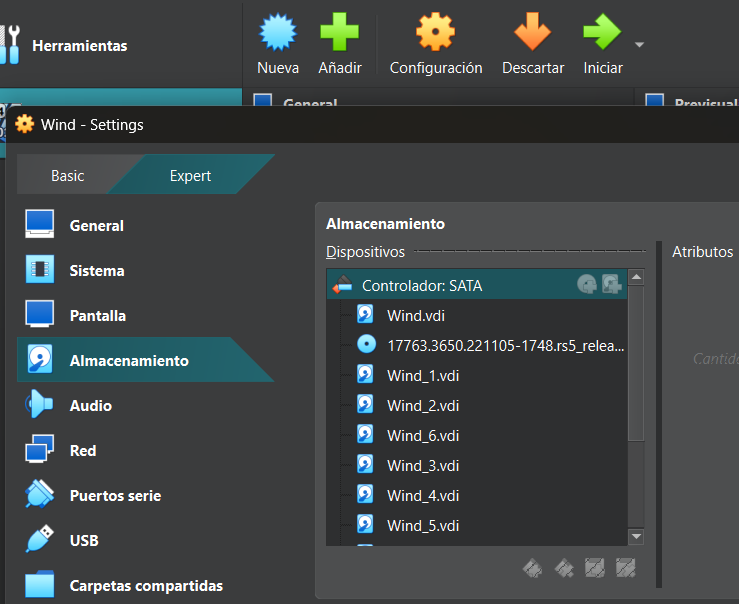






*  Selecciona la máquina virtual en la lista y haz clic en Iniciar, la máquina arrancará desde la ISO, comenzando la instalación de Windows Server 2019.


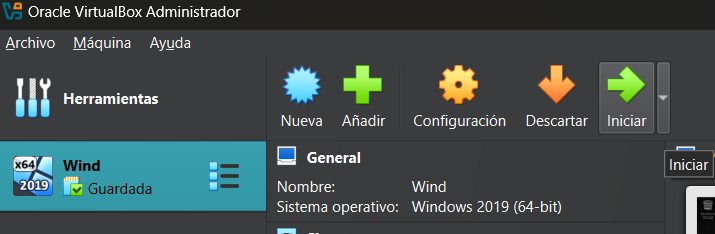

*   En el instalador, configuramos:
      Idioma, formato de hora/moneda y método de teclado.
      Hacemos clic en Siguiente y luego en Instalar ahora.
*   Seleccionamos la edición de Windows Server que vamos a instalar (por ejemplo, "Standard (Desktop Experience)").
*   Aceptamos los términos de licencia.
*   Elegimos el tipo de instalación Personalizada.
*   Seleccionamos el disco principal (40 GB) para instalar Windows.
*   Hacemos clic en Siguiente y seguimos las instrucciones para completar la instalación.

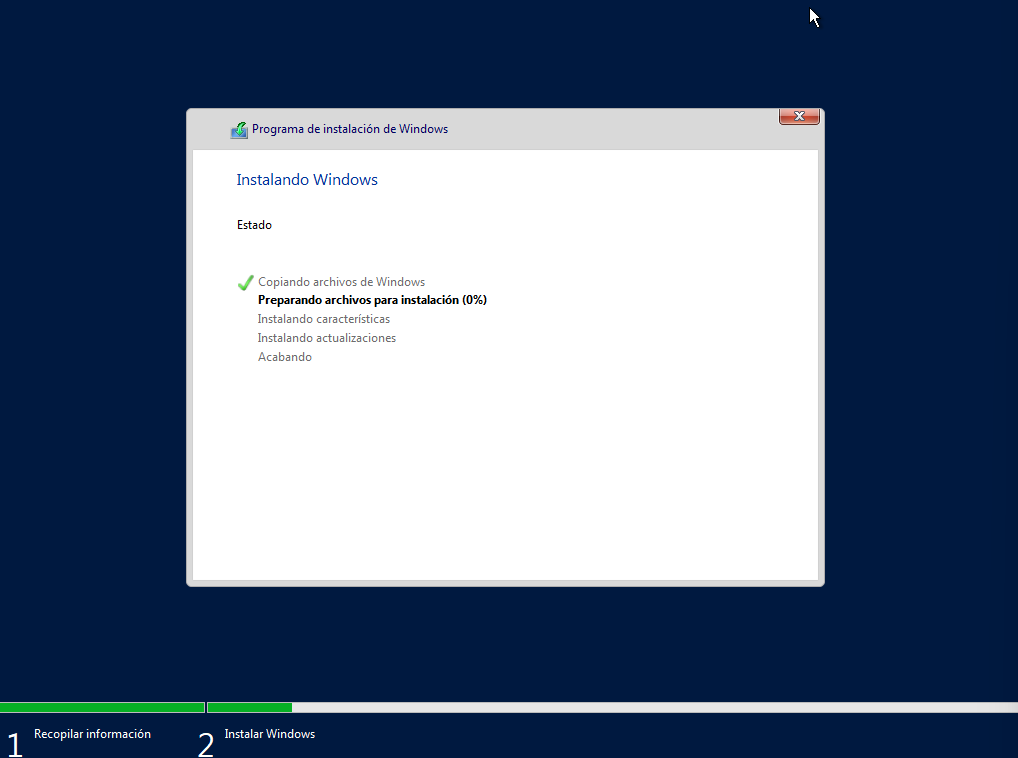

**Configurar los Discos**



*   Desde el entorno de Windows Server, ingresamos y seleccionando Manage.
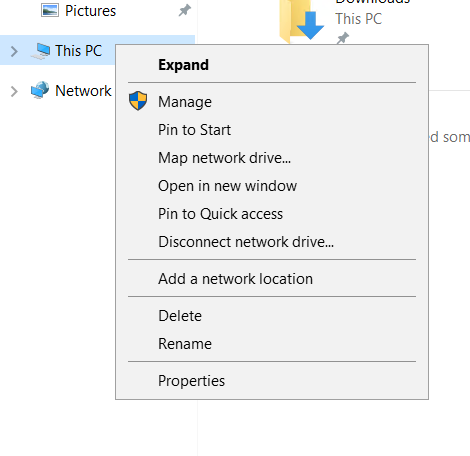



*   En el menú, seleccionamos File and Storage Services y luego navegamos a la sección Disks,
aquí se muestran todos los discos disponibles de la instancia, incluyendo los 11 discos adicionales, hacemos clic derecho sobre cada disco y seleccionamos la opción Bring Online para activar los discos.

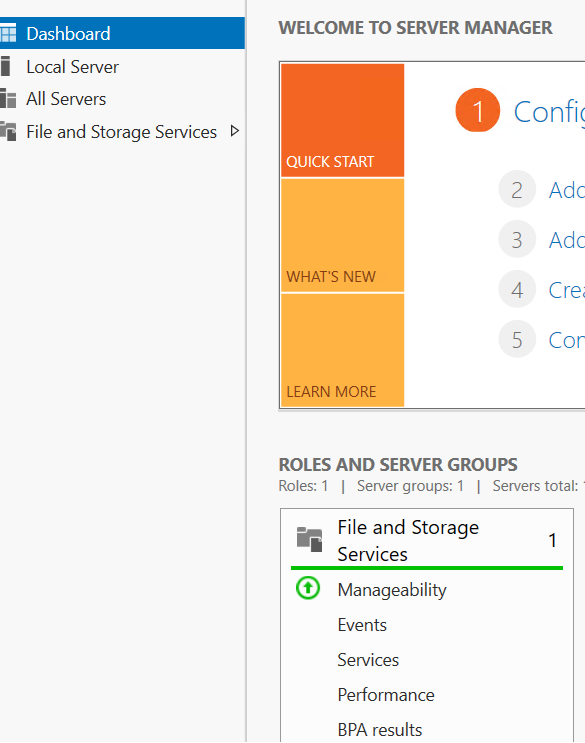

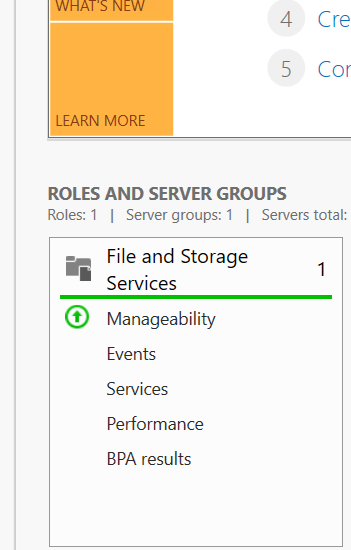






*   Ingresamos a Disk Management, seleccionamos cada disco que aparece como "no inicializado" y los inicializamos, luego Según la planificación configuramos:


  1.  RAID 5: Seleccionamos 3 discos para crear un RAID 5 y configurarlo como almacenamiento de backup.
  2. RAID 0: Usamos 2 discos para RAID 0, destinado a TempDB.
  3. RAID 10: Seleccionamos 4 discos para RAID 10, configurado para Data.
  4. RAID 1: Usamos los 2 discos restantes para RAID 1, dedicado a Log.

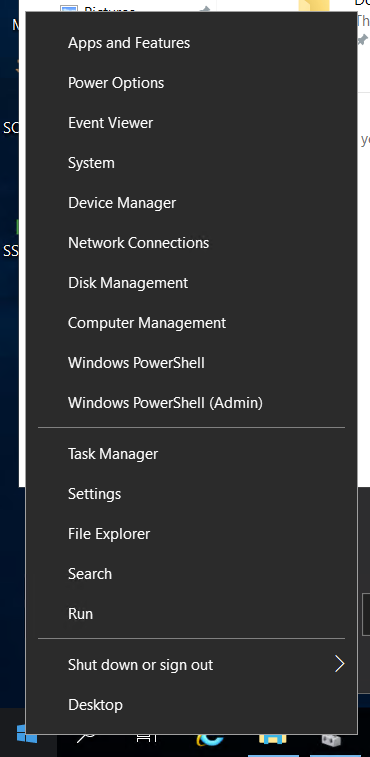

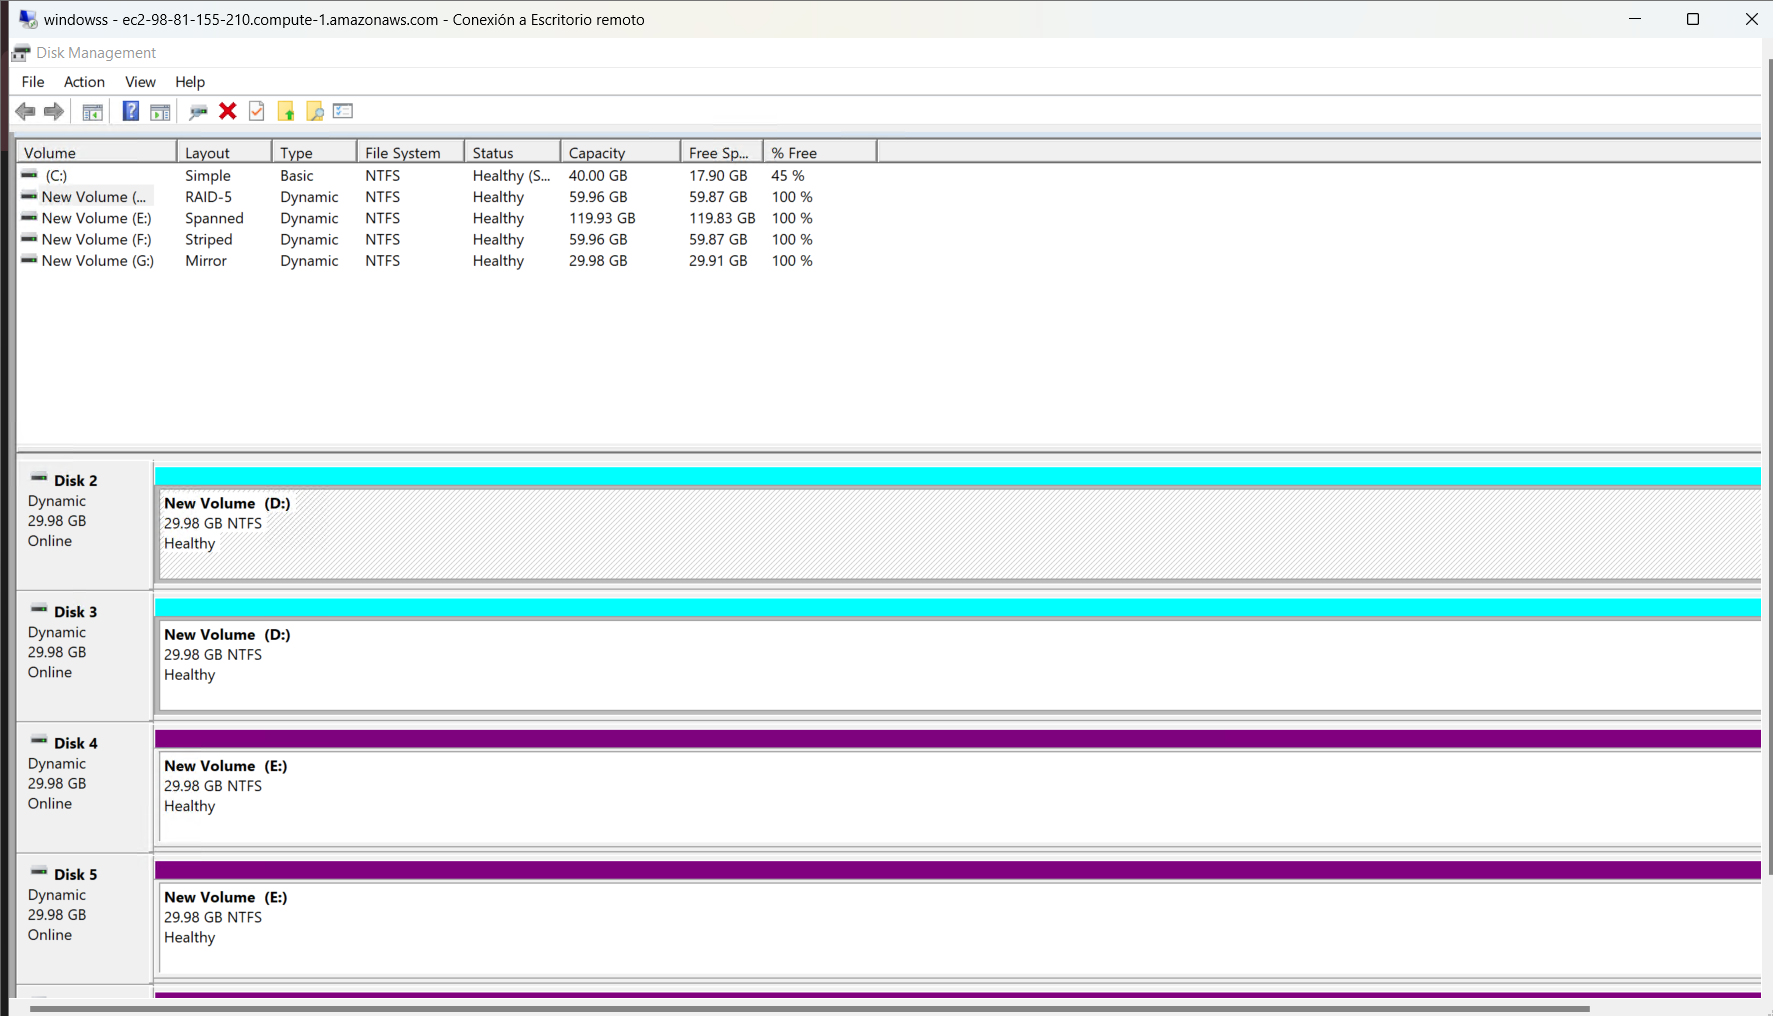



**Configuración de SQL Server**



*   Accedemos al sitio oficial de Microsoft SQL Server: [Descargar SQL Server](https://www.microsoft.com/es-es/sql-server/sql-server-downloads).

*   Seleccionamos la versión Developer (gratuita y para pruebas).
*   Descargamos el archivo de instalación y lo ejecutamos en la instancia.
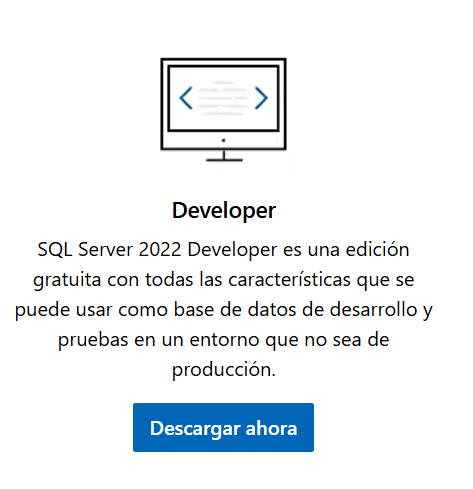

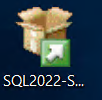



*   En el instalador, seleccionamos la opción de instalación Básica, proseguimos con la instalación y creamos una nueva instancia de SQL Server, definimos una contraseña segura para el usuario sa (Administrador del sistema).

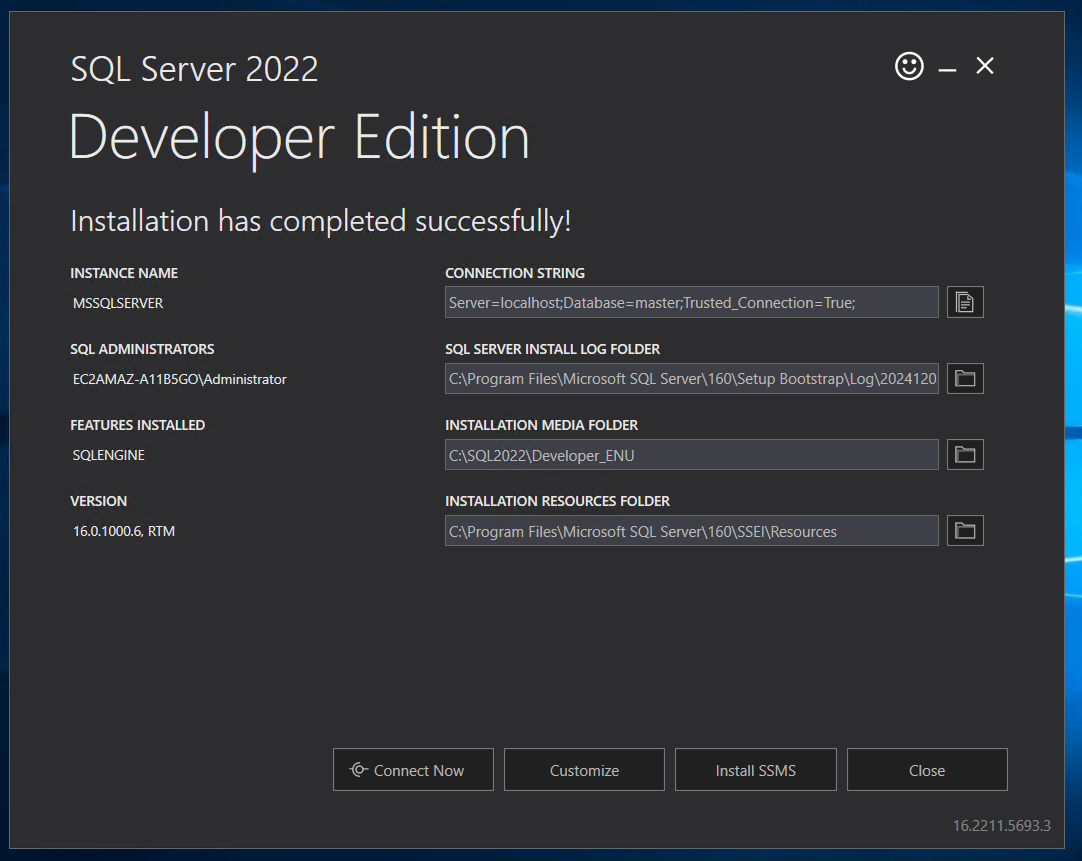

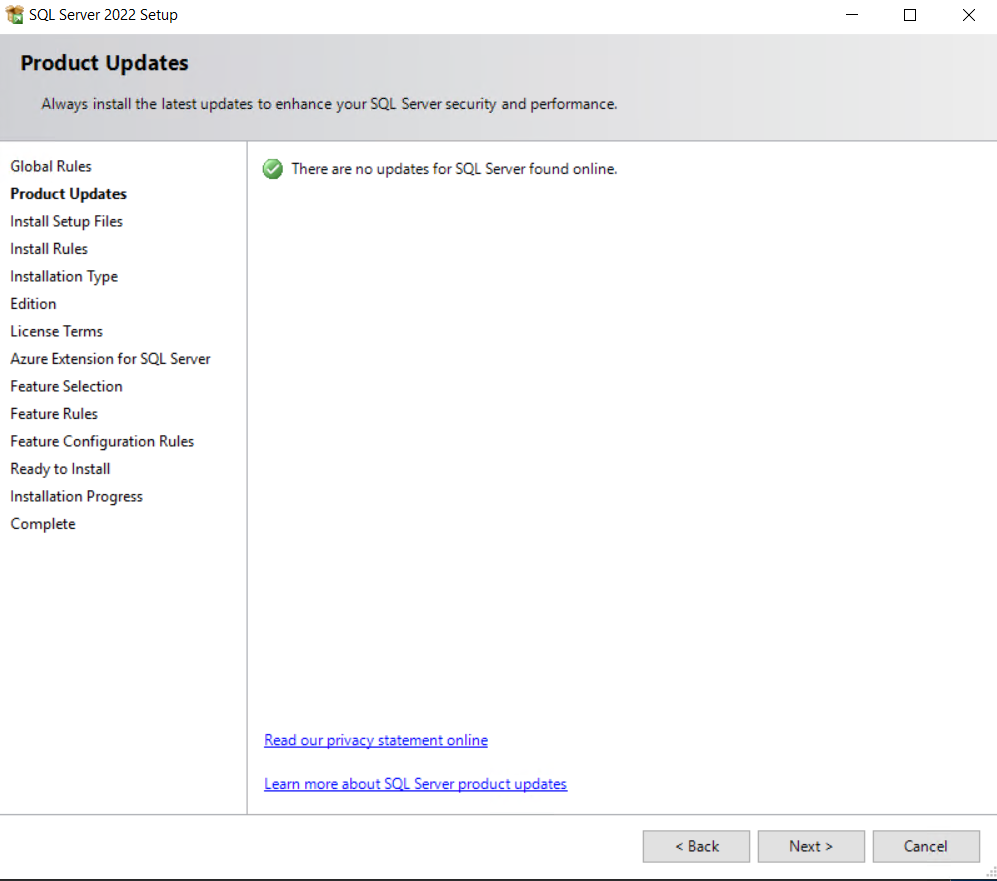





*   Antes de continuar con la configuración, otorgamos permisos con los siguientes comandos en el cmd

*   Si la unidad que deseamos configurar es, por ejemplo, la letra D:, ejecutamos los siguientes comandos:


```
takeown /f "D:\System Volume Information" /r /d y
icacls "D:\System Volume Information" /grant Administrators:(F) /t

```



*   Asignamos los directorios específicos según los RAID creados previamente:


1.   RAID 0: Ubicación para TempDB.
2. RAID 1: Ubicación para los Logs.
3. RAID 10: Ubicación para los Datos.
4. RAID 5: Ubicación para los Backups.



**Verificar el Funcionamiento**


*   Iniciamos sesión en SQL Server utilizando sqlcmd desde el CMD:


```
sqlcmd -S localhost\MSSQLSERVERR -U sa -P Sql@server10
```


*   Ejecutamos la siguiente consulta para visualizar las bases de datos disponibles:


```
SELECT name FROM sys.databases;
GO

```


*   Crear una Base de Datos y una Tabla de Prueba



```
-- Crear la base de datos TestDB
CREATE DATABASE TestDB;
GO

-- Usar la base de datos creada
USE TestDB;
GO

-- Crear una tabla llamada Personas
CREATE TABLE Personas (
    ID INT PRIMARY KEY IDENTITY(1,1),
    Nombre NVARCHAR(50),
    Edad INT
);
GO

-- Insertar registros de prueba en la tabla Personas
INSERT INTO Personas (Nombre, Edad) VALUES ('Juan', 30);
INSERT INTO Personas (Nombre, Edad) VALUES ('María', 25);
GO

```






